# Layout

   - We do a preliminary analysis of our data and find: 

    - **problem 1**: one of the classes is more significant than the rest. 

    - **problem 2**: we have many outliers
    

   - We will apply the **supervised learning models** seen in class: 

    - Decision Trees + Random Forest (related)
    - SVM  
    - k-Nearest Neighbours 
    - Naïve Bayes 
    - Linear Regression 
    - *NOT* perceptron since we are going to use NN later
    
   - We will apply the **unsupervised learning models** seen in class: 

    - K-means 
    - GMM

   - After we have optimized our models, we compare these models' performances with a **Neural Network**: 

    **Premise**: Neural Networks should allow a higher accuracy score than the supervised and unsupervised learning models. 


   - Ways of cleaning data: 

    - PCA
    - standardisation 
    - normalisation


   - Ways of evaluating models: 

    - confusion matrices
    - accuracy score
    - associated plots 

# Data

We import useful packages

In [265]:
#basics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import mode
import base64
import io
import os
import requests

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


We import the data 

In [106]:
path = "/Users/erikgutierrezduthiers/Desktop/CW_Intro_AI/data/"
filename = "CTG.xls"

df = pd.read_excel(path+filename, sheet_name = "Data",header=1)
df = df.reindex(np.random.permutation(df.index))
df.head()
# shape: (891, 12) assdsd

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
790,176,928,2,3,0,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
1419,1914,2567,5,0,4,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
1355,802,1611,1,0,3,3,0,0,0,NaN,...,-1,-1,1,-1,-1,-1,NaN,7,NaN,1
785,0,1199,1,16,0,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,1,NaN,1
1256,217,1219,1,0,7,1,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1


**Data description**:

* 2126 fetal cardiotocograms (CTGs).
* CTGs classified by: 
    * morphologic pattern (A, B, C....) - 10-class experiment
    * fetal state (N, S, P) - 3-class experiment

In [279]:
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]

#Prepare X and y
X = df[columns]
y1 = df["NSP"]
y2 = df["CLASS"]
X.head()



,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
790,123,2,3,0,0,0,0,50,0.9,4,...,82,58,140,7,0,129,128,130,5,1
1419,142,5,0,4,0,0,0,42,1.0,0,...,61,106,167,2,0,150,149,151,3,1
1355,132,1,0,3,3,0,0,24,1.5,0,...,77,76,153,5,2,140,133,137,17,1
785,117,1,16,0,0,0,0,53,0.7,8,...,77,56,133,6,0,123,121,123,3,1
1256,118,1,0,7,1,0,0,25,1.3,0,...,61,89,150,5,0,120,119,120,6,0


In [280]:
print(X.shape)
print(y1.shape)


(2126, 21)
(2126,)


# Standardization 


In [281]:
# Apply the standar scaler to features
sc = StandardScaler()
sc.fit(X)
X_std = pd.DataFrame(sc.transform(X),columns=columns)
X_std.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,-1.047296,-0.202944,-0.114270,-1.285798,-0.628375,-0.057476,-0.27153,0.175107,-0.490111,-0.317882,...,0.296666,-1.203911,-1.339211,0.994270,-0.458444,-0.516077,-0.424026,-0.559373,-0.476621,1.112980
1,0.883886,0.639750,-0.195096,0.119475,-0.628375,-0.057476,-0.27153,-0.290313,-0.376865,-0.535361,...,-0.242535,0.420275,0.165809,-0.701397,-0.458444,0.766175,0.922997,0.892590,-0.545656,1.112980
2,-0.132526,-0.483842,-0.195096,-0.231843,0.572277,-0.057476,-0.27153,-1.337508,0.189365,-0.535361,...,0.168284,-0.594841,-0.614572,0.316003,2.374846,0.155579,-0.103306,-0.075385,-0.062411,1.112980
3,-1.657144,-0.483842,0.235978,-1.285798,-0.628375,-0.057476,-0.27153,0.349640,-0.716603,-0.100403,...,0.168284,-1.271585,-1.729402,0.655137,-0.458444,-0.882435,-0.873034,-1.043360,-0.545656,1.112980
4,-1.555502,-0.483842,-0.195096,1.173429,-0.228158,-0.057476,-0.27153,-1.279331,-0.037127,-0.535361,...,-0.242535,-0.154957,-0.781796,0.316003,-0.458444,-1.065614,-1.001322,-1.250783,-0.442103,-0.524526


Data standardization is used to minimize the difference in the ranges of the features, ensuring the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features. However, scaling does not significantly affect our accuracy in our case because our features are within the same range (i.e., 0 - 200).  

# Outliers

We visualize the scaled data using boxplot: 

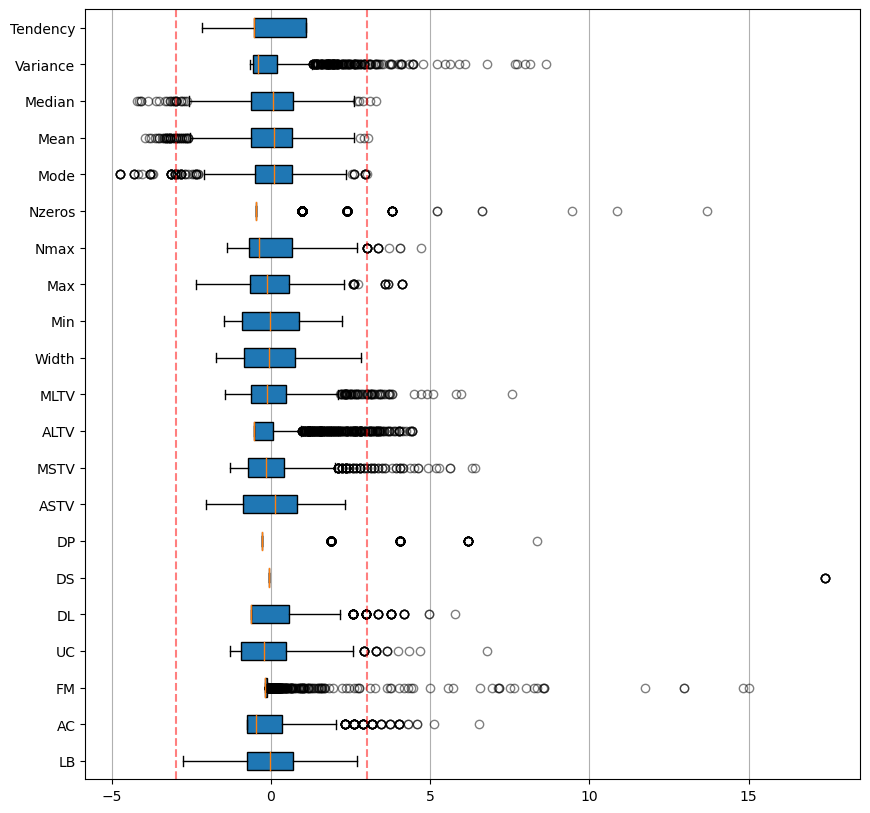

In [282]:
fig, ax = plt.subplots(figsize=(10,10))

bp = plt.boxplot(X_std,labels=columns,vert=0,patch_artist = True)

ax.axvline(3, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(-3, c = "red", linestyle="--", alpha = 0.5)


plt.gca().xaxis.grid(True)

# source for aestetic improvements: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
for dot in bp['fliers']:
    dot.set(marker ='o',
              color ='lightgrey',
              alpha = 0.5)
    

We have a lot of outliers deviating the mean of our features. This is a problem we must consider. 

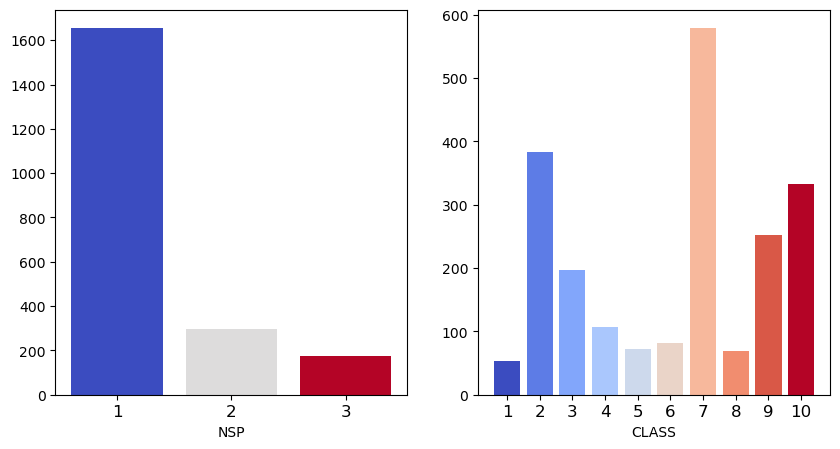

In [283]:
# colormap source: https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig, ax = plt.subplots(1,2,figsize = (10,5))

ax[0].bar(df["NSP"].unique(),df.groupby(by="NSP").size(), color=my_cmap(rescale(df["NSP"].unique())))
ax[1].bar(df["CLASS"].unique(),df.groupby(by="CLASS").size(),color=my_cmap(rescale(df["CLASS"].unique())))

ax[0].set_xticks(np.arange(1,4)) 
ax[0].set_xticklabels(np.arange(1,4), fontsize=12)
ax[0].set_xlabel("NSP")
ax[1].set_xticks(np.arange(1,11)) 
ax[1].set_xticklabels(np.arange(1,11), fontsize=12)
ax[1].set_xlabel("CLASS");

# Imbalanced Classification

The previous graph shows that there is a class imbalance. A way of fixing this is resampling our data. 

There are two ways of resampling data: 
    
   - **Under-Sampling**: removing some observations of the majority class.
   - **Over-Sampling**: adding more copies to the minority class.

## Under-Sampling

In [ ]:
# class count
class_count_1, class_count_2, class_count_3 = df['NSP'].value_counts()

print(class_count_1)
print(class_count_2)
print(class_count_3)

# Separate class
class_1 = X[df['NSP'] == 1]
class_2 = X[df['NSP'] == 2]
class_3 = X[df['NSP'] == 3]

print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)


In [ ]:
# random under-sampling

class_1_under = class_1.sample(class_count_2)

print('class 1:', class_1_under.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)


## Over-Sampling

In [287]:
# random over-sampling
class_2_over = class_2.sample(class_count_1, replace=True)
class_3_over = class_2.sample(class_count_1, replace=True)

print('class 1:', class_1.shape)
print('class 2:', class_2_over.shape)
print('class 3:', class_3_over.shape)



class 1: (1655, 21)
class 2: (1655, 21)
class 3: (1655, 21)


In [290]:
print('X: ', X.shape)

X_under = np.concatenate((class_1_under, class_2, class_3))
print('Under-sampled X: ', X_under.shape)

X_over = np.concatenate((class_1, class_2_over, class_3_over))
print('Over-sampled X: ', X_over.shape)


X:  (2126, 21)
Under-sampled X:  (766, 21)
Over-sampled X:  (4965, 21)


In [295]:
# do the same for y1

class_1 = y1[df['NSP'] == 1]
class_2 = y1[df['NSP'] == 2]
class_3 = y1[df['NSP'] == 3]

# under-sampling
class_1_under = class_1.sample(class_count_2)
y1_under = np.concatenate((class_1_under, class_2, class_3))
print('Under-sampled y: ', y1_under.shape)

# over-sampling
class_2_over = class_2.sample(class_count_1, replace=True)
class_3_over = class_2.sample(class_count_1, replace=True)
y1_over = np.concatenate((class_1, class_2_over, class_3_over))
print('Over-sampled X: ', y1_over.shape)



Under-sampled y:  (766,)
Over-sampled X:  (4965,)


# Supervised Learning Models 


In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error

class SLClassifiers(): 
    
    
    def __init__(self, X, y): 
        
        self.X = X
        self.y = y 
        
    
    def confusion_matrix(self, y_pred, y_test, target_labels): 
        
        cm = confusion_matrix(y_pred,y_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels);
        disp.plot();
        
    
    def train_test_split(self): 
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, train_size=0.8,random_state=35)
        
        return X_train, X_test, y_train, y_test
    
        
    def decision_tree(self): 
        
        X_train, X_test, y_train, y_test = self.train_test_split()
        dt = DecisionTreeClassifier(random_state=35)
        dt.fit(X_train,y_train)
        y_pred = dt.predict(X_test)
        print("Decision Tree accuracy: %.2f" % accuracy_score(y_pred,y_test) )
        
        #self.confusion_matrix(y_pred, y_test, dt.classes_)
        
    
    def random_forest(self, n_estimators=10, criterion="entropy"): 
        
        X_train, X_test, y_train, y_test = self.train_test_split()
        rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        print("Random Forest accuracy: %.2f" % accuracy_score(y_pred,y_test) )
        
        #self.confusion_matrix(y_pred, y_test, rf.classes_)

    
    def support_vector_machine(self, kernel = "linear", C=10000): 
       
        X_train, X_test, y_train, y_test = self.train_test_split()
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        print("Support Vector Machine accuracy: %.2f" % accuracy_score(y_test, y_pred))
        
        #self.confusion_matrix(y_pred, y_test, rf.classes_)
        
        
    def k_nearest_neighbours(self, n=3): 
    
        X_train, X_test, y_train, y_test = self.train_test_split()
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        knn.predict(X_test)
        print("K-Nearest Neighbours accuracy: %.2f" % accuracy_score(y_pred,y_test) )
        
        
    def gaussian_naive_bayes(self):
       
        X_train, X_test, y_train, y_test = self.train_test_split()
        gnb = GaussianNB()
        gnb.fit(X_train, y_train);
        gnb.predict(X_test)
        print("Gaussian Naive Bayes accuracy: %.2f" % accuracy_score(y_pred,y_test) )


slc = SLClassifiers(X, y1)

    

Let us apply all the supervised learning models to our raw data to see how well the classifiers perform.   

In [207]:
dt = slc.decision_tree()
rf = slc.random_forest(n_estimators=100)
svm = slc.support_vector_machine()
knn = slc.k_nearest_neighbours()
gnb = slc.gaussian_naive_bayes()

Decision Tree accuracy: 0.92
Random Forest accuracy: 0.95
Support Vector Machine accuracy: 0.89
K-Nearest Neighbours accuracy: 0.92
Gaussian Naive Bayes accuracy: 0.92


In [296]:
# under-sampled data 
slc = SLClassifiers(X_under, y1_under)

dt = slc.decision_tree()
rf = slc.random_forest(n_estimators=100)
svm = slc.support_vector_machine()
knn = slc.k_nearest_neighbours()
gnb = slc.gaussian_naive_bayes()

Decision Tree accuracy: 0.90
Random Forest accuracy: 0.88
Support Vector Machine accuracy: 0.81


ValueError: Found input variables with inconsistent numbers of samples: [426, 154]

In [297]:
# over-sampled data
slc = SLClassifiers(X_over, y1_over)

dt = slc.decision_tree()
rf = slc.random_forest(n_estimators=100)
svm = slc.support_vector_machine()
knn = slc.k_nearest_neighbours()
gnb = slc.gaussian_naive_bayes()


Decision Tree accuracy: 0.98
Random Forest accuracy: 0.99
Support Vector Machine accuracy: 0.92


ValueError: Found input variables with inconsistent numbers of samples: [426, 993]

# Unsupervised Learning Models

In [239]:
class ULClassifiers():
    
    def __init__(self, X, y): 

        self.X = X
        self.y = y 
        
        
    def mask(self, clusters): 
        
        labels = np.zeros_like(clusters)

        for i in range(3): 
            mask = (clusters == i)
            labels[mask] = mode(y1[mask])[0]
        
        return labels
    
    
    def PCA(self, n=2): 
        
        pca = PCA(n_components=n)
        pca.fit(X)
        X_pca = pca.transform(X)
        
        return X_pca

    
    def gaussian_mixture_models(self, n=3):
        
        gmm = GaussianMixture(n_components=n).fit(X)
        clusters = gmm.predict(self.X)
        labels = self.mask(clusters)
        print("Gaussian Mixture Models accuracy: %.2f" % accuracy_score(self.y, labels))
        
    
    def k_means(self, n=3, rs=0):
    
        km = KMeans(n_clusters=n, random_state=rs)
        clusters = km.fit_predict(self.X)
        labels = self.mask(clusters)
        print("k Means accuracy: %.2f" % accuracy_score(self.y, labels))
        

ulc = ULClassifiers(X, y1)

Let us apply all the supervised learning models to our raw data to see how well the classifiers perform. 

In [238]:
gmm = ulc.gaussian_mixture_models()
km = ulc.k_means()

Gaussian Mixture Models accuracy: 0.78
k Means accuracy: 0.78


# NEURAL NETWORKS

In [252]:
#helpful functions 

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

In [267]:
X,y = to_xy(df, 'NSP')

print(y.shape)

#encode the target labels in binary
y_encoded = to_categorical(y, dtype ="uint8")
print(y_encoded.shape)


(2126, 3)
(2126, 3, 2)


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = Sequential()
model.add(Dense(4, input_shape=X[1].shape, activation='sigmoid')) # Hidden 1
model.add(Dense(y_encoded.shape[1], activation='softmax')) # Output
model.summary() #note, only works if input shape specified, or Input layer given

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 184       
                                                                 
 dense_9 (Dense)             (None, 3)                 15        
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [269]:
# train and test

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train,y_train,verbose=2,epochs=10)

pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1) 
score = accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Epoch 1/10
50/50 - 0s - loss: nan - 438ms/epoch - 9ms/step
Epoch 2/10
50/50 - 0s - loss: nan - 133ms/epoch - 3ms/step
Epoch 3/10
50/50 - 0s - loss: nan - 187ms/epoch - 4ms/step
Epoch 4/10
50/50 - 0s - loss: nan - 92ms/epoch - 2ms/step
Epoch 5/10
50/50 - 0s - loss: nan - 85ms/epoch - 2ms/step
Epoch 6/10
50/50 - 0s - loss: nan - 79ms/epoch - 2ms/step
Epoch 7/10
50/50 - 0s - loss: nan - 94ms/epoch - 2ms/step
Epoch 8/10
50/50 - 0s - loss: nan - 81ms/epoch - 2ms/step
Epoch 9/10
50/50 - 0s - loss: nan - 83ms/epoch - 2ms/step
Epoch 10/10
50/50 - 0s - loss: nan - 81ms/epoch - 2ms/step
17/17 [==============================] - 0s 2ms/step
Accuracy score: 0.7800751879699248
